In [1]:
 users = [
        { "id": 0, "name": "Hero" },
        { "id": 1, "name": "Dunn" },
        { "id": 2, "name": "Sue" },
        { "id": 3, "name": "Chi" },
        { "id": 4, "name": "Thor" },
        { "id": 5, "name": "Clive" },
        { "id": 6, "name": "Hicks" },
        { "id": 7, "name": "Devin" },
        { "id": 8, "name": "Kate" },
        { "id": 9, "name": "Klein" }
]


In [2]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                   (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [3]:
for user in users:
    user["friends"] = []

In [4]:
for i, j in friendships:
    users[i]["friends"].append(users[j])
    users[j]["friends"].append(users[i])

In [5]:
def number_of_friends(users):
    """how many friends does _user_ have?"""
    return len(user["friends"])


In [6]:
total_connections = sum(number_of_friends(user)
                       for user in users)

In [11]:
from __future__ import division # integer division is lame
num_users = len(users)
avg_connections = total_connections / num_users

In [12]:
# create a list (user_id, number_of_friends)
num_friends_by_id = [(user["id"], number_of_friends(user))
                    for user in users]

In [18]:
def friends_of_friend_ids_bad(user):
# "foaf" is short for "friend of a friend" 
    return [foaf["id"]
        for friend in user["friends"] 
        for foaf in friend["friends"]]
# for each of user's friends
# get each of _their_ friends

In [19]:
print([friend["id"] for friend in users[0]["friends"]])

[1, 2]


In [20]:
print([friend["id"] for friend in users[1]["friends"]])

[0, 2, 3]


In [21]:
print([friend["id"] for friend in users[2]["friends"]])

[0, 1, 3]


In [22]:
from collections import Counter

In [23]:
def not_the_same(user, other_user):
    """two users are not the same if they have different ids"""
    return user["id"] != other_user["id"]
def not_friends(user, other_user):
    """other_user is not a friend if he's not is user["friends"];
    that is, if he's not_the same as all the people in user["friends"]"""
    return all(not_the_same(friend, other_user)
               for friend in user["friends"])


In [24]:
def friends_of_friend_ids(user):
    return Counter(foaf["id"]
                  for friend in user["friends"]
                  for foaf in friend["friends"]
                  if not_the_same(user, foaf)
                  and not_friends(user, foaf))

In [25]:
print(friends_of_friend_ids(users[3]))

Counter({0: 2, 5: 1})


In [26]:
interests = [
        (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
        (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
        (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
        (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
        (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
        (3, "statistics"), (3, "regression"), (3, "probability"),
        (4, "machine learning"), (4, "regression"), (4, "decision trees"),
        (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
        (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
        (6, "probability"), (6, "mathematics"), (6, "theory"),
        (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
        (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
        (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
        (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [27]:
def data_scientiest_who_like(target_interest):
    return [user_id
           for user_id, user_interest in interests
           if user_interest == target_interest]

In [30]:
from collections import defaultdict

In [31]:
# key are interesetes, values are lists of user-ids with that interest
user_ids_by_interest = defaultdict(list)

In [32]:
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

In [33]:
#keys are user_ids, values are lists of interests for that user_id
interests_by_user_id = defaultdict(list)

In [34]:
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

In [35]:
def most_common_interests_with(user):
    return Counter(interested_user_id
                  for interest in interests_by_user_id[user["id"]]
                  for interested_user_id in user_ids_by_interest[interest]
                  if interested_user_id != user["id"])

In [36]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                            (48000, 0.7), (76000, 6),
                            (69000, 6.5), (76000, 7.5),
                            (60000, 2.5), (83000, 10),
                            (48000, 1.9), (63000, 4.2)]

In [37]:
%matplotlib inline

In [38]:
salary_by_tenure = defaultdict(list)

In [39]:
for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

In [40]:
average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

In [41]:
average_salary_by_tenure

{0.7: 48000.0,
 1.9: 48000.0,
 2.5: 60000.0,
 4.2: 63000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 8.1: 88000.0,
 8.7: 83000.0,
 10: 83000.0}

In [42]:
def tenure_bucket(tenure):
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"

In [44]:
salary_by_tenure_bucket = defaultdict(list)

In [45]:
for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

In [46]:
# keys are tenure buckets, values are average salary for  that bucket

In [51]:
 interests = [
        (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
        (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
        (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
        (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
        (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
        (3, "statistics"), (3, "regression"), (3, "probability"),
        (4, "machine learning"), (4, "regression"), (4, "decision trees"),
        (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
        (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
        (6, "probability"), (6, "mathematics"), (6, "theory"),
        (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
        (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
        (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
        (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [52]:
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split())

In [53]:
for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

data 3
learning 3
big 3
java 3
python 3
scikit-learn 2
neural 2
statistics 2
regression 2
hadoop 2
probability 2
r 2
cassandra 2
hbase 2
machine 2
networks 2


In [54]:
for i in [1, 2, 3, 4, 5]:
    print(i)
    for j in [1, 2, 3, 4, 5]:
        print(j)
        print(i+j)
    print(i)
print("done looping")

1
1
2
2
3
3
4
4
5
5
6
1
2
1
3
2
4
3
5
4
6
5
7
2
3
1
4
2
5
3
6
4
7
5
8
3
4
1
5
2
6
3
7
4
8
5
9
4
5
1
6
2
7
3
8
4
9
5
10
5
done looping


In [55]:
long_winded_computation=(1+2+3+4+5+6+7+8+9+10+11+12+ 13+14+15+16+17+18+19+20)

In [57]:
list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
easier_to_read_list_of_lists = [ [1, 2, 3],
                                     [4, 5, 6],
[7,8,9]]

In [58]:
import re
my_regex = re.compile("[0-9]+", re.I)

In [59]:
import re as regex

In [60]:
my_regex = regex.compile("[0-9]+", regex.I)

In [61]:
import matplotlib.pyplot as plt

In [62]:
from collections import defaultdict, Counter
lookup = defaultdict(int)
my_counter = Counter()
match = 10
from re import *
print(match)

<function match at 0x101b61268>


In [63]:
def double(x):
    """this is where you put an optional docstring
    that explains what the function does.
    for exampmle, this fnction multiples its input by 2"""
    return x * 2

In [64]:
def apply_to_one(f):
    """calls the functon f with 1 as its argument"""
    return f(1)

In [65]:
my_double = double
x = apply_to_one(my_double)

In [66]:
y = apply_to_one(lambda x: x + 4)

In [67]:
def another_double(x): return 2 * x

In [68]:
def my_print(message = "my default message"):
    print(message)
    my_print("hello")
    my_print()

In [70]:
def substract(a = 0, b = 0):
    return a - b

In [71]:
single_quoted_string = 'data science'


In [72]:
double_quoted_string = 'data science'

In [73]:
integer_list = [1, 2, 3]
heterogeneous_list = ["string", 0.1, True]
list_of_lists = [ integer_list, heterogeneous_list, [] ]
list_length = len(integer_list) # equals 3 list_sum = sum(integer_list) # equals 6

In [78]:
x = range(10)
zero = x[0]
one = x[1]
nine = x[-1]
eight = x[-2]


In [79]:
my_list = [1, 2]
my_tuple = (1, 2)
other_tuple = 3, 4
my_list[1] = 3

In [80]:
try:
    my_tuple[1] = 3
except TypeError:
    print("cannot modify a tuple")

cannot modify a tuple


In [81]:
def sum_and_product(x, y):
    return (x + y), (x * y)

In [82]:
sp = sum_and_product(2, 3)

In [83]:
s, p = sum_and_product(5, 10)

In [84]:
x, y = 1, 2

In [85]:
x, y = y, x

In [89]:
empty_dit = {}
empty_dict2 = dict()
grades = { "Joel" : 80, "Tim" : 95}

In [91]:
joels_grade = grades["Joel"]

In [92]:
try:
    kates_grade = grades["Kate"]
except KeyError:
    print("no grade for Kate!")

no grade for Kate!


In [93]:
joel_has_grade = "Joel" in grades

In [94]:
kate_has_grade = "Kate" in grades

In [95]:
joels_grade = grades.get("Joel", 0)
kates_grade = grades.get("Kate", 0)
no_ones_grades = grades.get("No One")

In [96]:
grades["Tim"] = 99
grades["Kate"] = 100
num_students = len(grades)

In [97]:
tweet = {
        "user" : "joelgrus",
        "text" : "Data Science is Awesome",
        "retweet_count" : 100,
        "hashtags" : ["#data", "#science", "#datascience", "#awesome", "#yolo"]
}

In [98]:
tweet_keys = tweet.keys()

In [99]:
tweet_values = tweet.values()

In [100]:
tweet_items = tweet.items()

In [101]:
"user" in tweet_keys

True

In [102]:
"user" in tweet

True

In [104]:
from collections import Counter

In [105]:
c = Counter([0, 1, 2, 0])

In [107]:
s = set()

In [108]:
s.add(1)

In [109]:
s.add(2)

In [111]:
s.add(2)

In [112]:
x = len(s)

In [113]:
y = 2 in s

In [114]:
z = 3 in s

In [116]:
import random
[random.random() for _ in range(4)]

[0.29925914054310965,
 0.7865138995165839,
 0.2526194151463528,
 0.3418856121467202]

In [117]:
random.seed(10)
print(random.random())

0.5714025946899135


In [118]:
random.seed(10)

In [120]:
print(random.random())

0.5714025946899135


In [121]:
up_to_ten = range(10)

In [123]:
up_to_ten

range(0, 10)

In [125]:
random.choice(["Alice", "Bob", "Charlie"])

'Charlie'

In [126]:
lottery_numbers = range(60)

In [127]:
winning_numbers = random.sample(lottery_numbers, 6)

In [128]:
winning_numbers

[0, 13, 29, 52, 31, 56]

In [129]:
four_with_replacement = [random.choice(range(10)) for _ in range(4)]

In [130]:
four_with_replacement

[4, 2, 0, 8]

In [132]:
def exp(base, power):
    return base ** power

In [133]:
def two_to_the(power):
    return exp(2, power)

In [134]:
from functools import partial

In [135]:
two_to_the = partial(exp, 2)

In [136]:
print(two_to_the(3))

8


In [137]:
square_of = partial(exp, power = 2)

In [138]:
print(square_of(3))

9


In [139]:
def double(x):
    return 2 * x

In [140]:
xs = [1, 2, 3, 4]

In [141]:
twice_xs = [double(x) for x in xs]

In [142]:
twice_xs = map(double, xs)

In [143]:
list_doubler = partial(map, double)

In [144]:
twice_xs = list_doubler(xs)

In [147]:
def multiply(x, y): return x * y

In [148]:
products = map(multiply, [1, 2], [4, 5])

In [149]:
def is_even(x):
    """True if x is even, False if x is odd"""
    return x % 2 == 0

In [150]:
x_evens = [x for x in xs if is_even(x)]

In [151]:
x_evens = filter(is_even, xs)

In [152]:
list_evener = partial(filter, is_even)

In [153]:
x_evens = list_evener(xs)

In [157]:
%matplotlib inline

In [158]:
from matplotlib import pyplot as plt

In [159]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

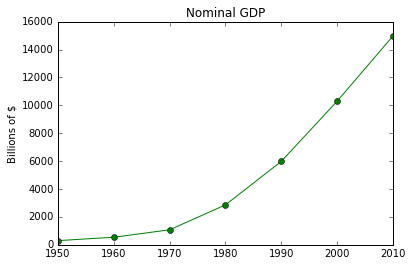

In [160]:
plt.plot(years, gdp, color = "green", marker = "o", linestyle = "solid")
# add a title
plt.title("Nominal GDP")
# add alabel to the y-axis
plt.ylabel("Billions of $")
plt.show()

In [161]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

In [162]:
xs = [i + 0.1 for i, _ in enumerate(movies)]

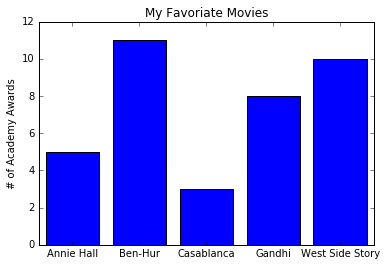

In [164]:
# plot bars with left x-coordinates [xs], heights [num_oscars]
plt.bar(xs, num_oscars)
plt.ylabel("# of Academy Awards")
plt.title("My Favoriate Movies")
plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
plt.show()

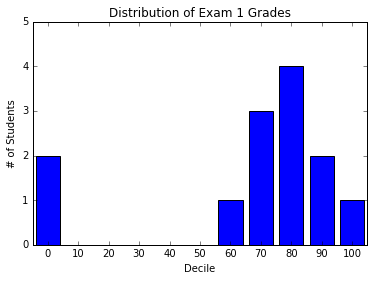

In [166]:
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0] 
decile = lambda grade: grade // 10 * 10
histogram = Counter(decile(grade) for grade in grades)
plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
        histogram.values(),
        8)
plt.axis([-5, 105, 0, 5])
plt.xticks([10 * i for i in range(11)]) 
plt.xlabel("Decile")
plt.ylabel("# of Students") 
plt.title("Distribution of Exam 1 Grades") 
plt.show()
# give each bar its correct height
# give each bar a width of 8
# x-axis from -5 to 105,
# y-axis from 0 to 5
# x-axis labels at 0, 10, ..., 100

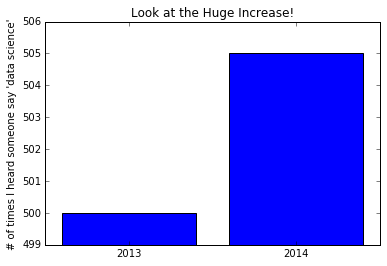

In [168]:
mentions = [500, 505]
years = [2013, 2014]
plt.bar([2012.6, 2013.6], mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
plt.ticklabel_format(useOffset = False)
plt.axis([2012.5, 2014.5, 499, 506])
plt.title("Look at the Huge Increase!")

In [169]:
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256] 
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)] 
xs = [i for i, _ in enumerate(variance)]


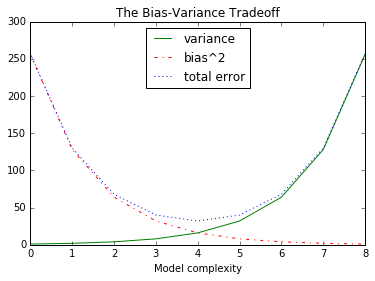

In [170]:
plt.plot(xs, variance, 'g-', label = 'variance')
plt.plot(xs, bias_squared, 'r-.', label = 'bias^2')
plt.plot(xs, total_error, 'b:', label = 'total error')
plt.legend(loc = 9)
plt.xlabel("Model complexity")
plt.title("The Bias-Variance Tradeoff")
plt.show()

In [171]:
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

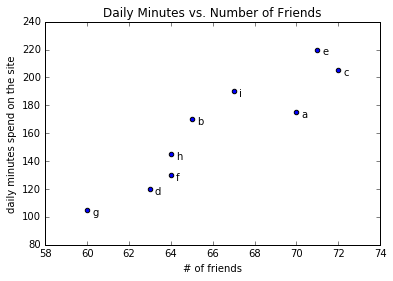

In [174]:
plt.scatter(friends, minutes)
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
                xy = (friend_count, minute_count),
                xytext = (5, -5),
                textcoords = 'offset points')
plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spend on the site")
plt.show()

In [175]:
test_1_grades = [99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

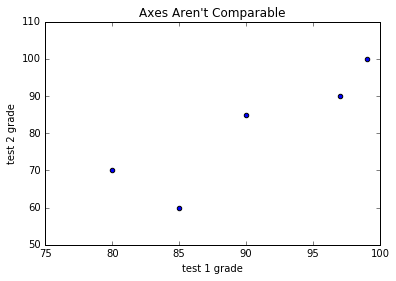

In [176]:
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

In [177]:
height_weight_age = [70, 170, 40]
grades = [95, 80, 75, 62]

In [178]:
def vector_add(v, w):
    """adds corresponding elements"""
    return [v_i + w_i 
           for v_i, w_i in zip(v, w)]

In [179]:
def vector_subtract(v, w):
    """subtracts corresponding elements"""
    return [v_i - w_i
           for v_i, w_i in zip(v, w)]

In [180]:
def vector_sum(vectors):
    """sums all corresponding elements"""
    result = vectors[0]
    for vector in vectors[1:]:
        result = vector_add(result, vector)
    return result

In [181]:
def vector_sum(vectors):
    return reduce(vector_add, vectors)

In [182]:
def scalar_multiply(c, v):
    """c is a number, v is a vector"""
    return [c * v_i for v_i in v]

In [183]:
def vector_mean(vectors):
    """compute the vector whose ith elemnt is the mean of the 
    ith elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [184]:
def dot(v, w):
    """v_1 * w_1 + ... v_n * w_n"""
    return sum(v_i * w_i
              for v_i, w_i in zip(v, w))

In [185]:
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

In [186]:
import math

In [187]:
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

In [188]:
def squared_distance(v, w):
    """(v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(vector_subtract(v, w))

In [189]:
def distance(v, w):
    return math.sqrt(square_distance(v, w))

In [190]:
def distance(v, w):
    return magnitude(vector_subtract(v, w))

In [191]:
A = [[1, 2, 3],
    [4, 5, 6]]

In [192]:
B = [[1, 2],
    [3, 4],
    [5, 6]]

In [193]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

In [194]:
def get_row(A, i):
    return A[i]

In [195]:
def get_column(A, j):
    return [A_i[j]
           for A_i in A]

In [196]:
def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix
    whose (i, j)th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j)
            for j in range(num_cols)]
           for i in range(num_rows)]

In [197]:
def is_diagonal(i, j):
    """1's on the 'diagnoal', 0's everywhere else"""
    return 1 if i == j else 0

In [199]:
identity_matrix = make_matrix(5, 5, is_diagonal)

In [200]:
identity_matrix

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [201]:
friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0
[1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1
               [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], 
               # user 2 [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # user 3 
               [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # user 4 
               [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # user 5 
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 6
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 7 
               [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # user 8 
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # user 9

In [202]:
friendships[0][2] == 1

True

In [203]:
friendships[0][0] == 1

False

In [205]:
friends_of_five = [i 
                   for i, is_friend in enumerate(friendships[5])
                   if is_friend]

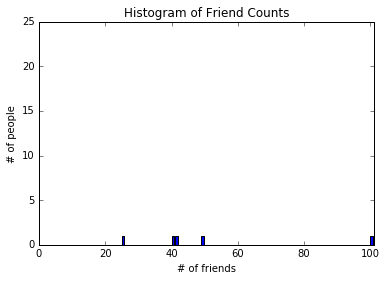

In [207]:
num_friends = [100, 49, 41, 40, 25]
friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")


In [208]:
num_points = len(num_friends)

In [209]:
largest_value = max(num_friends)

In [210]:
smallest_valeu = min(num_friends)

In [211]:
sorted_values = sorted(num_friends)

In [212]:
smallest_vlue = sorted_values[0]

In [213]:
second_smallest_vlaue = sorted_values[1]

In [214]:
second_largest_value = sorted_values[-2]

In [215]:
def mean(x):
    return sum(x) / len(x)

In [216]:
mean(num_friends)

51.0

In [217]:
def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    if n % 2 == 1:
        # if add, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo]  + sorted_v[hi]) / 2

In [218]:
median(num_friends)

41

In [219]:
def quantile(x, p):
    """return the pth-percentile valeu in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

In [220]:
quantile(num_friends, 0.10)

25

In [222]:
quantile(num_friends, 0.25)

40

In [223]:
quantile(num_friends, 0.75)

49

In [ ]:
def mode(x):
    """return a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x]